# Palabras clave:

Bayes, Naive Bayes Multinomial y Gaussiano, Probabilidad, Probabilidad condicional, Likelihood, Verosimilitud, Clasificación, Tokenización, Stemming, Lemmatización, Distribución, Stop Words, NLTK, Count Vectorizer, Vocabulario, sklearn, dataframe, pandas, sparse matrix, NLP.

# Naive Bayes

En el reciente caso las probabilidades de ocurrencia de H o T quedaban multiplicadas ya que se asume independencia entre una tirada y otra de la moneda.
Naive Bayes es una técnica estadística que consiste en repetir el método anterior en problemas cuyos sucesos no son independientes, pero suponiendo independencia.
Pongamos como ejemplo la clasificación de artículos periodísticos. En este caso podríamos estimar la probabilidad de ocurrencia de cada palabra según la categoría a la que pertenece el artículo.

Veamos un ejemplo concreto

In [5]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [6]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [7]:
len(twenty_train.data) #Cantidad de artículos periodísticos

11314

In [8]:
len(twenty_train["target"]) #Cantidad de clasificaciones. Debería coincidir con la cantidad de artículos

11314

In [9]:
twenty_train["target"] #Clasificaciones de los artículos

array([7, 4, 4, ..., 3, 1, 8])

In [10]:
twenty_train["target_names"] #Referencia de las clasificaciones. 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
len(twenty_train["target_names"]) #Cantidad de categorías

20

In [12]:
twenty_train.data[0] # Primer artículo

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [13]:
twenty_train.target[0] #Código de clasificación del primer artículo

7

In [14]:
twenty_train.target_names[7] #Clasificación del primer artículo

'rec.autos'

En resumen, tenemos un dataset que contiene 11314 artículos periodísticos, clasificados en 20 tipos.
Ahora vamos a armar un bag of words y a filtrar un poco el vocabulario.

Vamos a aplicar el siguiente procesamiento:

- Tokenization (nltk)
- Lemmatization (nltk)
- Stop Words (nltk)
- Stemming (nltk)
- Filtrado de palabras
- Obtención del vocabulario (countvectorizer)
- Estimación de la probabilidad de ocurrencia de cada palabra para cada categoría
- Estimación de la probabilidad de cada categoría

Mas info en:
http://text-processing.com/demo/stem/

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
#for art in twenty_train.data:
art=twenty_train.data[0]
tok=word_tokenize(art)
print("\nArtículo tokenizado:")
print(tok)
lem=[lemmatizer.lemmatize(x,pos='v') for x in tok]
print("\nLematización")
print(lem)
stop = [x for x in lem if x not in stopwords.words('english')]
print("\nEliminando stopwords:")
print(stop)
stem=[stemmer.stem(x) for x in stop]
print("\nAplicando stemming")
print(stem)
alpha=[x for x in stem if x.isalpha()]
print("\nFiltrando no-palabras:")
print(alpha)

[nltk_data] Downloading package wordnet to /home/cselmo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/cselmo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cselmo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Artículo tokenizado:
['From', ':', 'lerxst', '@', 'wam.umd.edu', '(', 'where', "'s", 'my', 'thing', ')', 'Subject', ':', 'WHAT', 'car', 'is', 'this', '!', '?', 'Nntp-Posting-Host', ':', 'rac3.wam.umd.edu', 'Organization', ':', 'University', 'of', 'Maryland', ',', 'College', 'Park', 'Lines', ':', '15', 'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2-door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors',

In [24]:
#Procesando todos los artículos:
articulos_filtrados=list()
for idx in range(len(twenty_train.data)):
    if idx%100==0:
        print(idx)
    art=twenty_train.data[idx]
    tok=word_tokenize(art)
    lem=[lemmatizer.lemmatize(x,pos='v') for x in tok]
    stop = [x for x in lem if x not in stopwords.words('english')]
    stem=[stemmer.stem(x) for x in stop]
    alpha=[x for x in stem if x.isalpha()]
    articulos_filtrados.append(" ".join(alpha))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300


In [25]:
print(articulos_filtrados[6])

from bmdelan brian man delaney subject brain tumor treatment thank bmdelan organ univers chicago line there peopl respond request info treatment astrocytoma email I could thank directli prob sean debra sharon So I think I publicli thank everyon thank I sure glad I accident hit rn instead rm I tri delet file last septemb hmmm


In [26]:
#Salvado del procesamiento a disco:
import pickle

with open('art_filt.txt', 'wb') as fp:
    pickle.dump(articulos_filtrados, fp)

In [27]:
with open ('art_filt.txt', 'rb') as fp:
    itemlist = pickle.load(fp)

In [28]:
print(itemlist[16])

from ab allen B subject Re tiff philosoph signific organ purdu univers line In articl prestonm martin preston write whi use PD C librari tiff file It take good minut start use app I certainli use whenev I tiff usual work well that point I philosoph oppos complex thi complex lead program poor tiff writer make bizarr file program inabl load tiff imag though save cours gener inabl interchang imag differ environ despit fact think understand tiff As say go It I worri asshol I big troubl misus abus tiff year I chalk immens unnecessari complex format In word tiff spec appendix G page capit emphasi mine the problem sort success tiff design power flexibl expens simplic It take fair amount effort handl option current defin specif probabl NO applic doe A complet job current way sure abl import tiff imag sinc mani applic If program wors applic ca read everi tiff imag mean I might deal whi would I want imag trap format I neither anyon agre anyon cours ab


In [29]:
# Extracting features from articles
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.8,min_df=10)
count_vect.fit(itemlist) #Aprende el vocabulario y le asigna un código a cada palabra

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [30]:
count_vect.vocabulary_ #Estos son los índices de cada una de las palabras

{'thing': 8119,
 'what': 8880,
 'car': 1177,
 'univers': 8503,
 'maryland': 4886,
 'colleg': 1519,
 'park': 5872,
 'wonder': 8981,
 'anyon': 358,
 'could': 1770,
 'enlighten': 2621,
 'saw': 7052,
 'day': 1983,
 'it': 4169,
 'sport': 7591,
 'look': 4702,
 'late': 4510,
 'earli': 2464,
 'call': 1127,
 'the': 8082,
 'door': 2354,
 'realli': 6566,
 'small': 7423,
 'in': 3907,
 'addit': 86,
 'front': 3137,
 'bumper': 1061,
 'separ': 7182,
 'rest': 6759,
 'bodi': 892,
 'thi': 8111,
 'know': 4428,
 'if': 3841,
 'model': 5163,
 'name': 5340,
 'engin': 2614,
 'spec': 7546,
 'year': 9088,
 'product': 6315,
 'make': 4822,
 'histori': 3669,
 'whatev': 8881,
 'info': 3985,
 'pleas': 6120,
 'thank': 8078,
 'il': 3854,
 'bring': 999,
 'neighborhood': 5403,
 'guy': 3454,
 'kuo': 4461,
 'si': 7307,
 'clock': 1458,
 'poll': 6156,
 'final': 2954,
 'summari': 7824,
 'report': 6722,
 'keyword': 4381,
 'acceler': 36,
 'upgrad': 8551,
 'washington': 8816,
 'fair': 2836,
 'number': 5562,
 'brave': 971,
 'soul

In [31]:
vocabulary=count_vect.get_feature_names() #Estos nombres de las palabras seleccionadas para el vocabulario, ordenadas por orden alfabético
print(vocabulary)

['aa', 'aaa', 'aaron', 'ab', 'abandon', 'abbrevi', 'abc', 'aberystwyth', 'abid', 'abil', 'abl', 'abnorm', 'aboard', 'abolish', 'abomin', 'abort', 'abound', 'about', 'abov', 'abpsoft', 'abraham', 'abridg', 'abroad', 'absenc', 'absent', 'absolut', 'absorb', 'abstract', 'absurd', 'abund', 'abus', 'ac', 'academ', 'academi', 'academia', 'acc', 'acceler', 'acceller', 'accept', 'access', 'accessori', 'accid', 'accident', 'accommod', 'accomod', 'accompani', 'accompli', 'accomplish', 'accord', 'accordingli', 'account', 'accumul', 'accur', 'accuraci', 'accus', 'ace', 'ach', 'achiev', 'achkar', 'acid', 'ack', 'acker', 'acknowledg', 'aclu', 'acm', 'acquaint', 'acquir', 'acquisit', 'acronym', 'across', 'act', 'action', 'activ', 'activist', 'actual', 'acut', 'ad', 'adam', 'adapt', 'adaptec', 'adaptor', 'adb', 'adc', 'adcom', 'add', 'addict', 'addit', 'addr', 'address', 'adequ', 'adher', 'adirondack', 'adjac', 'adject', 'adjust', 'adl', 'admin', 'administ', 'administr', 'admir', 'admiss', 'admit', 'a

In [32]:
print(vocabulary[641])
print(count_vect.vocabulary_["bank"])

bank
641


In [33]:
count_vect = CountVectorizer(max_df=0.8,min_df=100)
X_train_data=count_vect.fit_transform(articulos_filtrados) #Aprende el vocabulario y le asigna un código a cada palabra

In [34]:
X_train_data.shape #Para cada documento hay un vector de ocurrencias

(11314, 1924)

In [35]:
X_train_data.toarray() #Es una sparse matrix, vamos a expandirla

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
X_train_data.toarray()[0,:].argmax() #Veamos a qué palabra pertenece la máxima ocurrencia en el primer artíclo

262

In [37]:
count_vect.vocabulary_["car"] #La máxima ocurrencia pertenece a "car"

262

In [38]:
import pandas as pd

In [39]:
alpha=1.0
columns=count_vect.get_feature_names()
df=pd.DataFrame(X_train_data.toarray(), columns=columns) # Se suma alpha a un artículo para que el log-likelihood no de -inf

In [40]:
df.head()

,abil,abl,about,absolut,abus,academ,acceler,accept,access,accid,...,ye,yeah,year,yesterday,yet,york,you,young,your,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [41]:
df["target_"]=twenty_train.target

In [42]:
df.head()

,abil,abl,about,absolut,abus,academ,acceler,accept,access,accid,...,yeah,year,yesterday,yet,york,you,young,your,zero,target_
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,14


Cantidad de palabras en el vocabulario:
1924
El vector de ocurrencias para la categoría 0 cuyo largo es 1924 es:
[ 26.  51.   3. ...,  23.  63.   4.]

Log-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:alt.atheism
[  3.87458274e-04   7.60014306e-04   4.47067239e-05 ...,   3.42751550e-04
   9.38841202e-04   5.96089652e-05]

Log-probabilidad de ocurrencia de la categoría: alt.atheism
0.04242531377054976
El vector de ocurrencias para la categoría 1 cuyo largo es 1924 es:
[  9.  62.   5. ...,   9.  28.   5.]

Log-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:comp.graphics
[  1.74010557e-04   1.19873939e-03   9.66725315e-05 ...,   1.74010557e-04
   5.41366176e-04   9.66725315e-05]

Log-probabilidad de ocurrencia de la categoría: comp.graphics
0.05161746508750221
El vector de ocurrencias para la categoría 2 cuyo largo es 1924 es:
[ 13.  41.   8. ...,   6.  27.   5.]

Log-probabilidad de ocurrencia de cada palabra en el vocabu

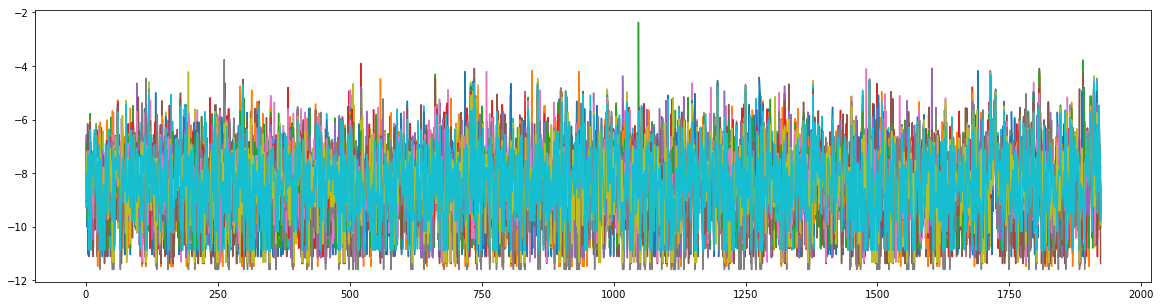

In [48]:
import numpy as np
from matplotlib import pyplot as plt
# Importo el paquete para graficar
from matplotlib import pyplot as plt

N=20 #Cantidad de categorías a filtrar para calcular las probabilidades condicionales

p_priori=list() #Inicializo una lista para guardar los vectores de probabilidad de cada palabra, para cada categoría
p_model=list() #Inicializo una lista para guardar la probabilidad de ocurrencia de cada categoría

num_arts=df.values.shape[0] #Me quedo con la cantidad de artículos
num_cols=df.values.shape[1]-1 #Me quedo con la cantidad de palabras en el vocabulario
print("Cantidad de palabras en el vocabulario:")
print(num_cols)

plt.figure(figsize=(20, 5)) #Inicializo el gráfico sobre el que voy a dibujar todas las distribuciones
for i in range(20):
    p_aux=sum(df.loc[df['target_'] == i].drop('target_',axis=1).values)+alpha #Sumo las ocurrencias para la categoría i y le sumo a todos los valores alpha, para no tener probabilidad cero
    print("El vector de ocurrencias para la categoría {} cuyo largo es {} es:".format(i,len(p_aux)))
    print(p_aux)
    print("\nLog-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:{}".format(twenty_train["target_names"][i]))
    print(p_aux/sum(p_aux))
    p_priori.append(np.log(p_aux/sum(p_aux)))
    print("\nLog-probabilidad de ocurrencia de la categoría: {}".format(twenty_train["target_names"][i]))
    print(df.loc[df['target_'] == i].shape[0]/num_arts)
    p_model.append(np.log(df.loc[df['target_'] == i].shape[0]/num_arts))
     # Tamaño del gráfico
    plt.plot(p_priori[-1]) # Grafico
    #plt.title(title)
plt.show()

In [49]:
#Agarramos un artículo en particular y calculamos el Likelihood de cada una de las categorías
n_art=56
print("Vamos a calcular los Log-likelihood para cada categoría. Utilizaremos el artículo {}".format(n_art))
print("El artículo pertenece a la categoría {}, la cual es {}".format(twenty_train["target"][n_art], twenty_train["target_names"][twenty_train["target"][n_art] ] ))
maxLogL=-float('inf')
for i in range(20):
    logL=np.dot((X_train_data.toarray()[n_art]),p_priori[i])+p_model[i]
    print("El log-likelihood para la categoría {} del artículo {} es:{}".format(i,n_art,logL))
    if logL>maxLogL:
        maxIdx=i
        maxLogL=logL
print("El Log-likelihood mayor pertenece a la categoría: {}".format(maxIdx))

Vamos a calcular los Log-likelihood para cada categoría. Utilizaremos el artículo 56
El artículo pertenece a la categoría 7, la cual es rec.autos
El log-likelihood para la categoría 0 del artículo 56 es:-992.3237612544019
El log-likelihood para la categoría 1 del artículo 56 es:-955.6678567235585
El log-likelihood para la categoría 2 del artículo 56 es:-956.0807534413605
El log-likelihood para la categoría 3 del artículo 56 es:-943.9567849072215
El log-likelihood para la categoría 4 del artículo 56 es:-957.0693638790765
El log-likelihood para la categoría 5 del artículo 56 es:-985.091487052275
El log-likelihood para la categoría 6 del artículo 56 es:-961.1427412816205
El log-likelihood para la categoría 7 del artículo 56 es:-883.2414924226738
El log-likelihood para la categoría 8 del artículo 56 es:-937.6581621605908
El log-likelihood para la categoría 9 del artículo 56 es:-1002.3202026301077
El log-likelihood para la categoría 10 del artículo 56 es:-993.3567679610701
El log-likelihood

In [50]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_data.toarray(), twenty_train["target"])
print("La predicción para el artículo {} es:".format(n_art))
print(clf.predict(X_train_data.toarray()[n_art:n_art+1]))

La predicción para el artículo 56 es:
[7]


In [53]:
porc=sum(np.array(clf.predict(X_train_data.toarray()))==np.array(twenty_train["target"]))/11314*100
print("El porcentaje de artículos clasificados correctamente es: {}%".format(porc))


El porcentaje de artículos clasificados correctamente es: 84.51476047374933%


# Ejercicio de multinomialNB

En el caso anterior, para medir la cantidad de artículos clasiicados correctamente se utilizó el mismo subconjunto del dataset que se utilizó para entrenar.

Esta medida no es una medida del todo útil, ya que lo que interesa de un clasificador es su capacidad de clasificación de datos que no fueron utilizados para entrenar. Es por eso que se pide, para el clasificador entrenado con el subconjunto de training, cual es el porcentaje de artículos del subconjunto de testing clasificados correctamente. Comparar con el porcentaje anterior y explicar las diferencias.

Para este ejercicio se puede utilizar el paquete multinomialNB que se encuentra dentro de naive-bayes en el paquete sklearn.

** Importante: para aplicar count vectorizer al dataset de testing sin redefinir el vocabulario, se debe usar el método transform, ya que fit y fit_transform recalculan el vocabulario. **

Se puede encontrar mas información del dataset en:

http://scikit-learn.org/stable/datasets/twenty_newsgroups.html#newsgroups

# Solución